In [ ]:
# @title Default title text
import pandas as pd
import numpy as np
data = {
    'Name': ['Tom', 'nick', 'krish', 'jack', 'David', 'Eva'],
    'Age': [20, 21, np.nan, 18, 25, np.nan],
    'Salary' : [50000, 60000, 70000, 80000, 90000, 100000],
    'city' : ['New York', 'San Francisco', 'Los Angeles', 'Chicago', 'Houston', np.nan],
    'Education' : ['Bachelor', 'Master', 'PhD', 'Bachelor', 'Master', 'PhD'],
    'Experience' : [2, 3, 4, 5, 6, 7],
    'Dependents' : [0,2,1,3,1,2],
    'Purchased' : ['Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'Purchased Category' : ['A', 'B', 'C', 'A', 'B', 'C'],
    'Rating' : [4.5,3.0,np.nan,4.0,5.0,2.5]
}

df = pd.DataFrame(data)

csv_path = '/content/data.csv'
df.to_csv(csv_path, index=False)
df = pd.read_csv(csv_path)

In [ ]:
df2 = pd.read_csv("/content/data.csv")

In [ ]:
print(df2.describe(include='all'))

       Name       Age         Salary      city Education  Experience  \
count     6   4.00000       6.000000         5         6    6.000000   
unique    6       NaN            NaN         5         3         NaN   
top     Tom       NaN            NaN  New York  Bachelor         NaN   
freq      1       NaN            NaN         1         2         NaN   
mean    NaN  21.00000   75000.000000       NaN       NaN    4.500000   
std     NaN   2.94392   18708.286934       NaN       NaN    1.870829   
min     NaN  18.00000   50000.000000       NaN       NaN    2.000000   
25%     NaN  19.50000   62500.000000       NaN       NaN    3.250000   
50%     NaN  20.50000   75000.000000       NaN       NaN    4.500000   
75%     NaN  22.00000   87500.000000       NaN       NaN    5.750000   
max     NaN  25.00000  100000.000000       NaN       NaN    7.000000   

        Dependents Purchased Purchased Category    Rating  
count     6.000000         6                  6  5.000000  
unique         

In [ ]:
#printing the total sum of number of null values in the dataset
print(df2.isnull().sum())

Name                  0
Age                   2
Salary                0
city                  1
Education             0
Experience            0
Dependents            0
Purchased             0
Purchased Category    0
Rating                1
dtype: int64


In [ ]:
#Handling Missing Values
#Impute misssing numerical values with  the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

#Impute misssing numerical values with  the mean
df['city'].fillna(df['city'].mode()[0], inplace=True)
df['Education'].fillna(df['Education'].mode()[0], inplace=True)

#verifying wheter there are any values or not
print(df.isnull().sum())

Name                  0
Age                   0
Salary                0
city                  0
Education             0
Experience            0
Dependents            0
Purchased             0
Purchased Category    0
Rating                0
dtype: int64


In [ ]:
#Normalization / Scalling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#cOLUMNS to scale
cloumns_to_scale = ['Age', 'Salary','Experience','Dependents','Rating']
df[cloumns_to_scale] = scaler.fit_transform(df[cloumns_to_scale])
print(df.head)
#df['Age'] = scaler.fit_transform(df[['Age']])
#df['Salary'] = scaler.fit_transform(df[['Salary']])

<bound method NDFrame.head of     Name       Age  Salary           city Education  Experience  Dependents  \
0    Tom  0.285714     0.0       New York  Bachelor         0.0    0.000000   
1   nick  0.428571     0.2  San Francisco    Master         0.2    0.666667   
2  krish  0.428571     0.4    Los Angeles       PhD         0.4    0.333333   
3   jack  0.000000     0.6        Chicago  Bachelor         0.6    1.000000   
4  David  1.000000     0.8        Houston    Master         0.8    0.333333   
5    Eva  0.428571     1.0        Chicago       PhD         1.0    0.666667   

  Purchased Purchased Category  Rating  
0       Yes                  A    0.80  
1        No                  B    0.20  
2       Yes                  C    0.52  
3        No                  A    0.60  
4       Yes                  B    1.00  
5        No                  C    0.00  >


In [ ]:
#Encoding Categorical Values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

#Label Encoding for binary categorical feature
le = LabelEncoder()
df['Purchased'] = le.fit_transform(df['Purchased'])


#Ordinal Encoding for Education
education_mapping = {'Bachelor': 1, 'Master': 2, 'PhD': 3}
df['Education'] = df['Education'].map(education_mapping)

#One-Hot Encoding for non-binary categorical feature
df = pd.get_dummies(df, columns=['city','Purchased Category'],drop_first=True)
print(df.head())

    Name       Age  Salary  Education  Experience  Dependents  Purchased  \
0    Tom  0.285714     0.0          1         0.0    0.000000          1   
1   nick  0.428571     0.2          2         0.2    0.666667          0   
2  krish  0.428571     0.4          3         0.4    0.333333          1   
3   jack  0.000000     0.6          1         0.6    1.000000          0   
4  David  1.000000     0.8          2         0.8    0.333333          1   

   Rating  city_Houston  city_Los Angeles  city_New York  city_San Francisco  \
0    0.80         False             False           True               False   
1    0.20         False             False          False                True   
2    0.52         False              True          False               False   
3    0.60         False             False          False               False   
4    1.00          True             False          False               False   

   Purchased Category_B  Purchased Category_C  
0             

In [ ]:
#Dimentionality Reduction
from sklearn.decomposition import PCA

#Apply PCA to reduce dimentionality
pca = PCA(n_components=2) # Reduce to 2 components for simplicity
pca_features = pca.fit_transform(df[cloumns_to_scale])

#Converting PCA features to DATA frames and concatenate with originial datyaset
df_pca = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])
print(df_pca.head())

        PC1       PC2
0  0.905773  0.041040
1  0.202403 -0.394729
2  0.189503  0.023754
3 -0.269292 -0.390465
4 -0.197568  0.839466


In [ ]:
from sklearn.decomposition import PCA

#Apply PCA to reduce dimentionality
pca = PCA(n_components=2) # Reduce to 2 components for simplicity
pca_features = pca.fit_transform(df[cloumns_to_scale])

#Converting PCA features to DATA frames and concatenate with originial datyaset
df_pca = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])
df = pd.concat([df, df_pca], axis=1)
print(df.head())

    Name       Age  Salary  Education  Experience  Dependents  Purchased  \
0    Tom  0.285714     0.0          1         0.0    0.000000          1   
1   nick  0.428571     0.2          2         0.2    0.666667          0   
2  krish  0.428571     0.4          3         0.4    0.333333          1   
3   jack  0.000000     0.6          1         0.6    1.000000          0   
4  David  1.000000     0.8          2         0.8    0.333333          1   

   Rating  city_Houston  city_Los Angeles  city_New York  city_San Francisco  \
0    0.80         False             False           True               False   
1    0.20         False             False          False                True   
2    0.52         False              True          False               False   
3    0.60         False             False          False               False   
4    1.00          True             False          False               False   

   Purchased Category_B  Purchased Category_C       PC1       

In [ ]:
#Features Selection
#Dropping the Name column (non- informative for modelling)
df.drop('Name', axis=1, inplace=True)
print(df.head())

        Age  Salary  Education  Experience  Dependents  Purchased  Rating  \
0  0.285714     0.0          1         0.0    0.000000          1    0.80   
1  0.428571     0.2          2         0.2    0.666667          0    0.20   
2  0.428571     0.4          3         0.4    0.333333          1    0.52   
3  0.000000     0.6          1         0.6    1.000000          0    0.60   
4  1.000000     0.8          2         0.8    0.333333          1    1.00   

   city_Houston  city_Los Angeles  city_New York  city_San Francisco  \
0         False             False           True               False   
1         False             False          False                True   
2         False              True          False               False   
3         False             False          False               False   
4          True             False          False               False   

   Purchased Category_B  Purchased Category_C       PC1       PC2  
0                 False             

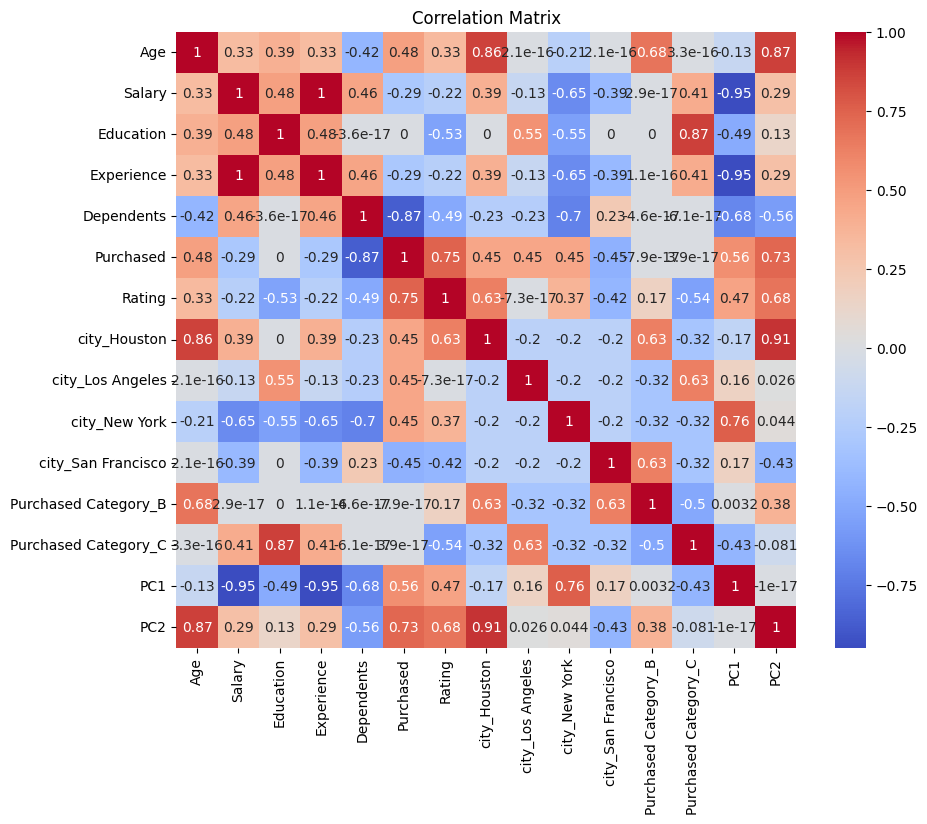

In [ ]:
#Correation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
# Show the plot
plt.show()

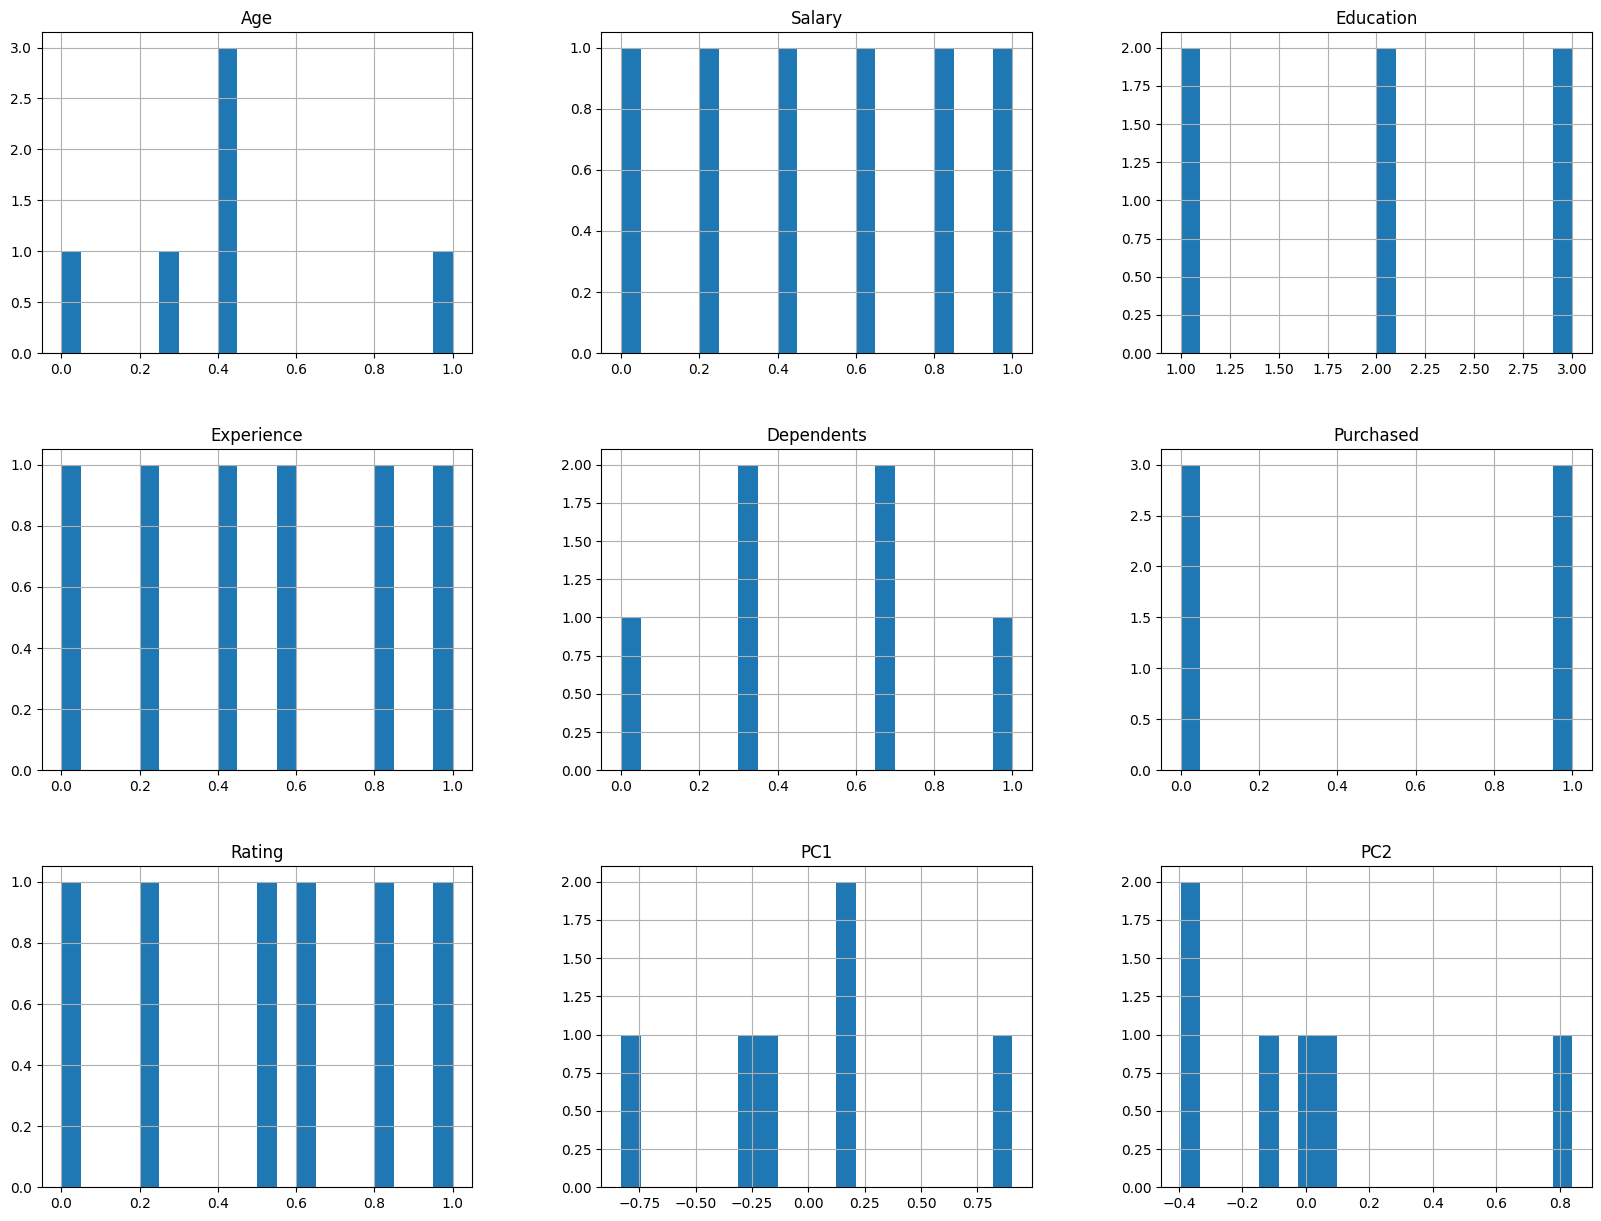

Age                     0.910791
Salary                  0.000000
Education               0.000000
Experience              0.000000
Dependents              0.000000
Purchased               0.000000
Rating                 -0.236981
city_Houston            2.449490
city_Los Angeles        2.449490
city_New York           2.449490
city_San Francisco      2.449490
Purchased Category_B    0.968246
Purchased Category_C    0.968246
PC1                     0.238508
PC2                     1.505949
dtype: float64


In [ ]:
#Data Distribution and Skewness
df.hist(bins=20, figsize=(20,15))
plt.show()

#Checking skewness
sk = df.skew()
print(sk)

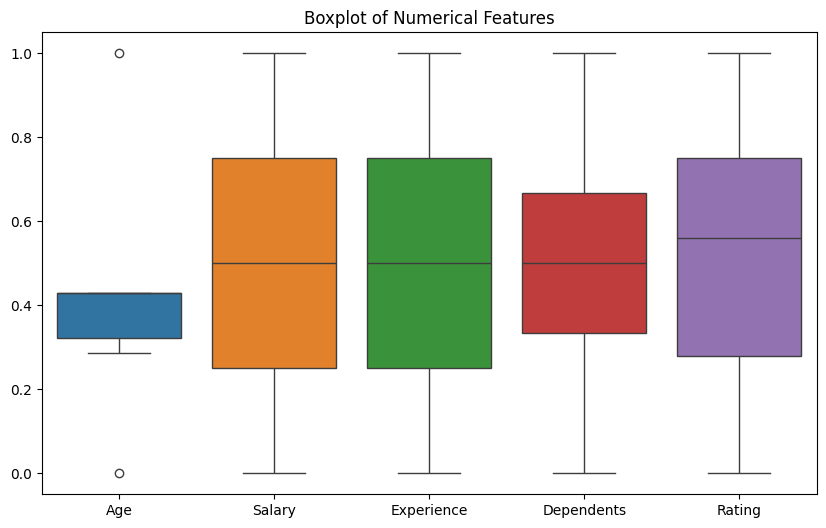

In [ ]:
#outlier Detection Using Visualization
#Boxplot for numerica; featutres
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[cloumns_to_scale])
plt.title('Boxplot of Numerical Features')
plt.show()


In above graph the middle lineindicates IQR i.e q3-q1(75%-25%)

above the line is the data plots in reange of less than IQR

below the line is the data plots in range of greater than TQR

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

#set seed for reproduceability
np.random.seed(42)

#create synthetic dataset
data = {
    'Age': np.random.randint(29,77, size=200),
    'Gender' : np.random.choice(['Male', 'Female'], size=200),
    'ChestPainType': np.random.choice(['ATA', 'NAP', 'ASY', 'TA'], size=200),
    'RestingBP': np.random.randint(90, 200, size=200),
    'Cholesterol': np.random.randint(126, 564, size=200),
    'FastingBS': np.random.choice([0, 1], size=200),
    'RestingECG': np.random.choice(['Normal', 'ST', 'LVH'], size=200),
    'MaxHR': np.random.randint(71, 202, size=200),
    'ExerciseAngina': np.random.choice(['N', 'Y'], size=200),
    'Oldpeak': np.random.uniform(0, 6.2, size=200),
    'ST_Slope': np.random.choice(['Up', 'Flat', 'Down'], size=200),
    'HeartDisease': np.random.choice([0, 1], size=200)
}

df = pd.DataFrame(data)

csvdata_path = '/content/data2.csv'
df.to_csv(csvdata_path, index=False)
df = pd.read_csv(csvdata_path)

In [ ]:
df.columns

Index(['Age', 'Gender', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope', 'HeartDisease'],
      dtype='object')

In [ ]:
df.isnull().sum()


,0
Age,0
Gender,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
num_fea = [ 'RestingBP', 'Cholesterol', 'MaxHR',]
cat_fea = ['Gender', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

#imoute numerical features
num_imputer = SimpleImputer(strategy='mean')
df[num_fea] = num_imputer.fit_transform(df[num_fea])

#imoute categorical features
cat_imputer = SimpleImputer(strategy = 'most_frequent')
df[cat_fea] = cat_imputer.fit_transform(df[cat_fea])
df.isnull().sum()

,0
Age,0
Gender,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0
